# Subtask 2: Compute the integral using trapezoidal rule

## Calculation of my function

In [80]:
import numpy as np

In [81]:
def f(x):
    return np.sin(x)

## Calculation of the trapezoidal rule

In [82]:
def trapezoidal(x):
    a = x[0]
    b = x[-1]
    N = len(x)
    value = 0
    for i in range(1, N):
        value += (f(x[i]) + f(x[i - 1])) * (x[i] - x[i - 1]) / 2
    return value

# Subtask 1: Compute the value analytically

## Analytical calculation of the integral and Calculation of the error depending on the discretization error

#### My function is f(x) = sin(x). Integration limits: a = 0; b = pi. As a result, the analytical answer is 2. In python, there are also different libraries, which allow one to calculate integrals quite precisely, e.x. SymPy.

In [83]:
from sympy import *
import numpy as np

analytical_answer = 2
x = Symbol('x')
sympy_answer = sympy.integrate(sin(x), (x, a, b))
print(f'Integration with sympy = {sympy_answer}')

a = 0
b = np.pi
# Discretization size
N = [10**3, 10**4, 10**5, 10**6]

errors_trap = []

for i in N:
    x_range = np.linspace(a, b, i)
    integral = trapezoidal(x_range)
    errors_trap.append(float(2 - integral))

Integration with sympy = 2.00000000000000


# Subtask 5: Plot integration error vs the discretization size

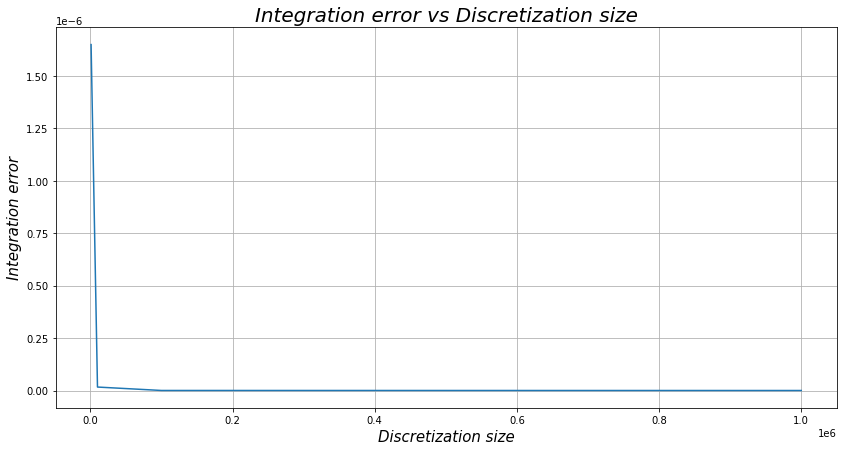

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (14, 7))
ax.plot(N, errors_trap)
ax.set_title('Integration error vs Discretization size', fontsize = 20, fontstyle = 'oblique')

plt.xlabel('Discretization size', fontsize = 15, fontstyle = 'oblique')
plt.ylabel('Integration error', fontsize = 15, fontstyle = 'oblique')

plt.grid(True)

plt.show()

# Subtask 3: Parallelize using MPI

In [85]:
%%writefile integral.py

import numpy as np
from mpi4py import MPI
import time

def f(x):
    return np.sin(x)

def trapezoidal(x):
    a = x[0]
    b = x[-1]
    N = len(x)
    value = 0
    for i in range(1, N):
        value += (f(x[i]) + f(x[i - 1])) * (x[i] - x[i - 1]) / 2
    return value
    
time_start = time.time()

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

a = 0
b = np.pi
N = 10**5 #number of points
x = np.linspace(a, b, N)

index = int(N / size)
index_rank = x[(rank * index):(index * (rank + 1))]

integral_part = trapezoidal(index_rank)

integral = comm.gather(integral_part, root = 0)

if rank == 0:
    print(np.sum(integral))
    work_time = time.time() - time_start
    print(work_time)

Overwriting integral.py


## Pearallel computation call and Calculation of speedup

In [88]:
import numpy as np

process = np.arange(1, 9)
calculation_time = []

for i in process:
    
    result = !mpiexec -np {i} python integral.py
    calculation_time.append(float(result[1]))
    
speedup = []
    
for i in calculation_time:
    speedup.append(calculation_time[0] / i)

## Plot of speedup vs number of processes

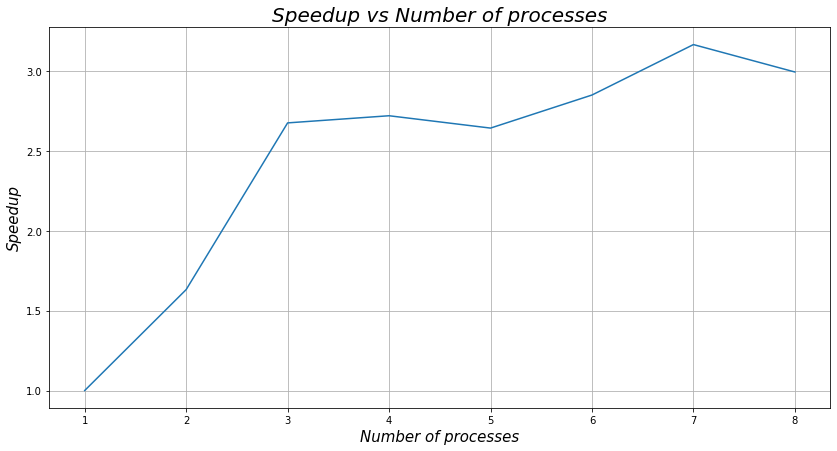

In [89]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (14, 7))

ax.plot(process, speedup)
ax.set_title('Speedup vs Number of processes', fontsize = 20, fontstyle = 'oblique')

plt.xlabel('Number of processes', fontsize = 15, fontstyle = 'oblique')
plt.ylabel('Speedup', fontsize = 15, fontstyle = 'oblique')

plt.grid(True)

plt.show()